## Statistique inférentielle - Théorie de l'échantillonnage - Exercice 11.1

On suppose que les poids de 3000 étudiants d’une université suivent une loi normale de moyenne 68.0 kg et d’écart-type 3.0 kg. 

Si l’on extrait 80 échantillons de 25 étudiants chacun, quelle est la moyenne et l’écart-type théoriques de la distribution d’échantillonnage des moyennes pour 

(a) un échantillonnage non exhaustif, 

(b) un échantillonnage exhaustif ?


In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from statistics import mean 

random.seed(1968)
np.random.seed(1968)

Voyons d'abord à quoi ressemble la distribution de poids pour la population globale... 

censée suivre une distribution gaussienne de centre 68 kg et d'écart-type 3 kg.

Pour ce faire, créons un dataframe Pandas, contenant des poids régulièrement répartis (50 pas) sur un intervalle $[\mu-4\sigma,\mu+4\sigma]$.

In [2]:
mu = 68.0
sigma = 3.0

fac = 4
poids_min = mu-fac*sigma
poids_max = mu+fac*sigma

distribution_df = pd.DataFrame({'poids':np.linspace(poids_min,poids_max,50)})

In [3]:
distribution_df.head()

,poids
0,56.000000
1,56.489796
2,56.979592
3,57.469388
4,57.959184


Définissons la fonction de distribution de probabilité des poids correctement normalisée, de façon à ce l'aire sous la courbe soit bien normalisée (aire sous la courbe = 1).

In [4]:
def distr_poids(x):
    return norm.pdf(x['poids'], loc=mu, scale=sigma)

In [5]:
distribution_df['dens'] = distribution_df.apply(distr_poids,axis=1)

In [6]:
distribution_df.head()

,poids,dens
0,56.000000,0.000045
1,56.489796,0.000085
2,56.979592,0.000156
3,57.469388,0.000281
4,57.959184,0.000491


Voyons graphiquement ce que cela donne. 

Nous ajouterons à la courbe 3 marques verticales:
- une barre verticale correspondant à la moyenne
- deux barres verticales correspondant à la moyenne + ou - un écart-type

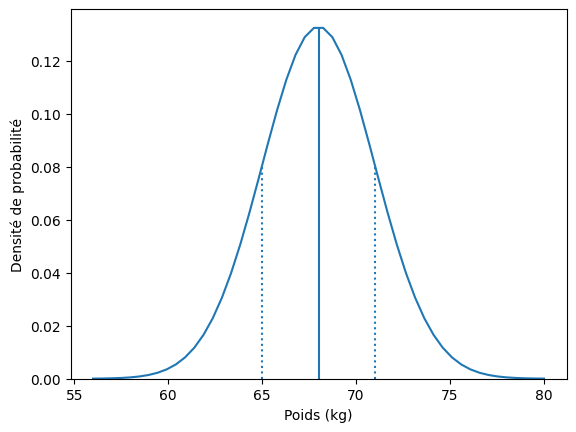

In [7]:
plt.plot(distribution_df['poids'],distribution_df['dens'])
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma)
plt.vlines([mu-sigma,mu+sigma],ymin=0,ymax=norm.pdf(1)/sigma,linestyles='dotted')
plt.ylim(bottom=0)
plt.ylabel("Densité de probabilité")
plt.xlabel("Poids (kg)")
plt.show()

Générons 'une' population de 3000 individus correspondant à la description ci-dessus.

Il faut noter que cette population particulière, même si aléatoirement générée, sera toujours la même car nous avons initié le générateur de nombre aléatoire au début du programme (random.seed(1968)).

In [8]:
N = 3000
mu = 68.0
sigma = 3.0

population_df = pd.DataFrame({'poids':np.random.normal(loc=mu,scale=sigma,size=N)})
population_df.head()

,poids
0,73.641781
1,74.619019
2,66.525969
3,63.760400
4,67.633898


Représentons cette population en nuage de points.

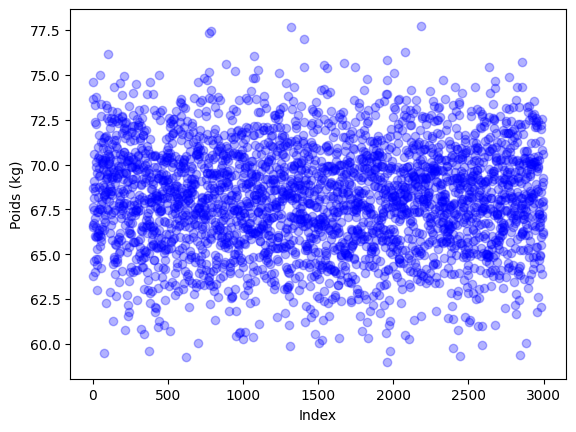

In [9]:
plt.plot(population_df['poids'],'o',color='blue', alpha=0.3)
plt.ylabel('Poids (kg)')
plt.xlabel('Index')
#plt.ylim(bottom=0)
plt.show()

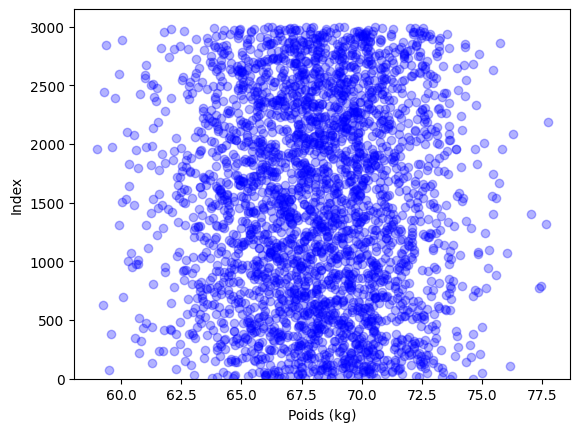

In [10]:
plt.plot(population_df['poids'],population_df.index,'o',color='blue',alpha=0.3)
plt.xlabel('Poids (kg)')
plt.ylabel('Index')
plt.ylim(bottom=0)
plt.show()

De ce nuage de poins, nous pouvons tirer un histogramme:

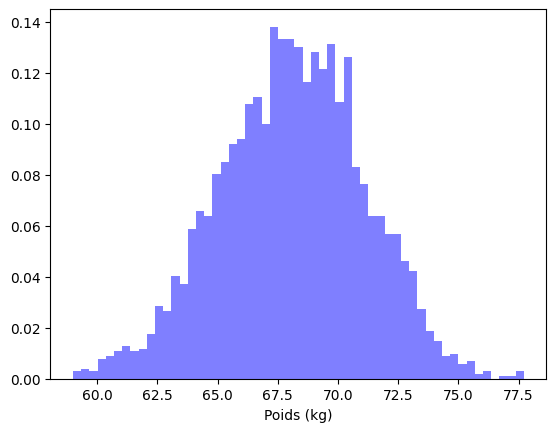

In [11]:
num_bins = round(math.sqrt(N))
n, bins, patches = plt.hist(population_df['poids'], num_bins, facecolor='blue', alpha=0.5, density=True)
#plt.hist(population_df['poids'])
plt.xlabel('Poids (kg)')
plt.show()

Et nous pouvons superposer cet histogramme avec la distribution de densité de probabilité construite ci-dessus. Nous aurons:

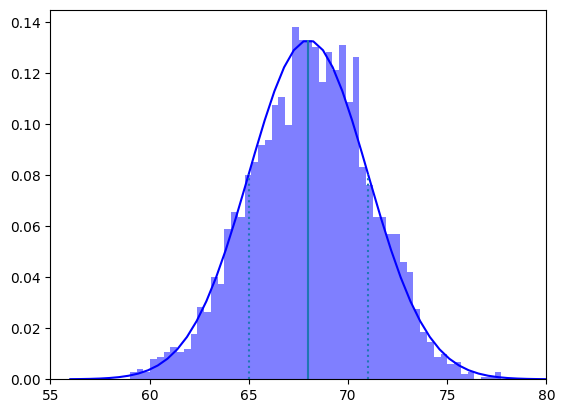

In [12]:
num_bins = round(math.sqrt(N))
n, bins, patches = plt.hist(population_df['poids'], num_bins, facecolor='blue', alpha=0.5, density=True)

plt.plot(distribution_df['poids'],distribution_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma)
plt.vlines([mu-sigma,mu+sigma],ymin=0,ymax=norm.pdf(1)/sigma,linestyles='dotted')

plt.ylim(bottom=0)
plt.xlim(55,80)
plt.show()

# Echantillon non exhaustif


In [ ]:
samples = []

for _ in range(80):
    sample = population_df.sample(n=25, replace=True)
    samples.append(sample)

samples[0]

,poids
2759,67.471392
2090,68.215159
2647,68.109119
2757,69.486729
795,67.326381
2865,71.706378
52,65.439507
427,69.883541
847,68.913987
2486,70.781958


In [14]:
moyennes = [s["poids"].mean() for s in samples]

moyennes

[np.float64(68.79631962808227),
 np.float64(68.18581557700612),
 np.float64(68.05533155695485),
 np.float64(68.04728758671048),
 np.float64(68.11372247219197),
 np.float64(67.69485598062816),
 np.float64(68.53492490970463),
 np.float64(67.72223074290999),
 np.float64(68.23504800608289),
 np.float64(68.355286493392),
 np.float64(68.59367192627343),
 np.float64(68.09663652940742),
 np.float64(68.6541291420729),
 np.float64(67.50428018555412),
 np.float64(68.41465297527051),
 np.float64(67.56047124239673),
 np.float64(68.45157393998335),
 np.float64(68.64684573494836),
 np.float64(68.89285060272428),
 np.float64(67.54450903510018),
 np.float64(66.99155949832043),
 np.float64(67.74256682688353),
 np.float64(67.95082758659025),
 np.float64(68.08024852210119),
 np.float64(69.1682285804353),
 np.float64(67.60586398357512),
 np.float64(68.81273562220537),
 np.float64(69.02342803017785),
 np.float64(68.30799386366675),
 np.float64(68.28148881656925),
 np.float64(67.89236793944373),
 np.float64(

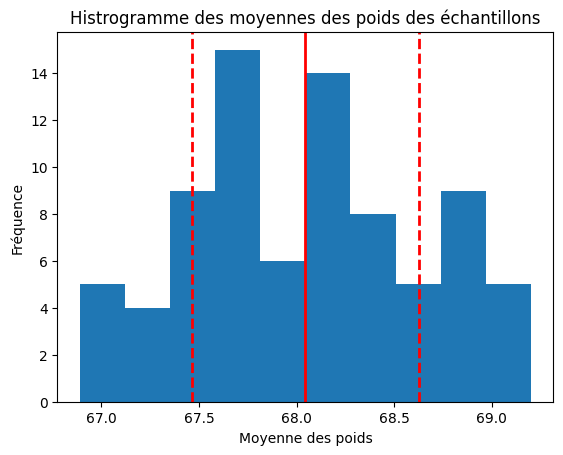

In [15]:
# la moyenne des moyennes
mu = np.mean(moyennes)

# ecart type
sigma = np.std(moyennes)

plt.hist(moyennes)

plt.axvline(mu, color='red', linestyle='-', linewidth=2)
plt.axvline(mu - sigma, color='red', linestyle='--', linewidth=2)
plt.axvline(mu + sigma, color='red', linestyle='--', linewidth=2)

plt.xlabel("Moyenne des poids")
plt.ylabel("Fréquence")
plt.title("Histrogramme des moyennes des poids des échantillons")
plt.show()